In [1]:
#Import Necessary Liabraries for predection

import pandas as pd                                          #For data manipulation and numerical operations.
import numpy as np                                           #For data manipulation and numerical operations.
import matplotlib.pyplot as plt                              #For data visualization.
import seaborn as sns                                        #For data visualization.
from sklearn.model_selection import train_test_split         #To split the dataset into training and testing sets.
from sklearn.linear_model import LogisticRegression          #To create and train a logistic regression model.
from sklearn.metrics import accuracy_score                   #To evaluate the accuracy of the model.
import warnings
warnings.filterwarnings('ignore')                            #Suppresses warnings that might clutter the output.

In [2]:
# Import data
data = pd.read_csv('https://raw.githubusercontent.com/snehuuu28/MYDAILYWORK/main/MOVIE%20RATING%20PREDICTION/IMDb%20Movies%20India.csv', encoding='ISO-8859-1')  

In [3]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Explore the Dataset

In [5]:
# Check the first few rows to see if it worked

data.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
data.info()    ## Display summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
data.describe()   # Display statistical summary of numerical columns

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [8]:
data.isnull().sum()   # Display the number of missing values for each column

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
data.shape   # Display the shape of the DataFrame

(15509, 10)

In [10]:
#Data Cleaning

In [11]:
data = data.drop_duplicates()  # Drop duplicates

In [12]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data.shape

(15503, 10)

In [14]:
# Fill or drop missing values

In [15]:
# Drop Votes column and rows with missing target (Rating)
data = data.drop(['Votes'], axis=1)
data = data.dropna(subset=['Rating'])

In [16]:
data["Rating"].fillna(data["Rating"].median(),inplace=True)   # Fill missing values in 'Rating' column with the mean

In [17]:
# Fill missing values in 'Actor1','Actor2','Actor3' column with the mode (most frequent value)
data["Actor 1"].fillna(data["Actor 1"].mode().iloc[0], inplace=True)
data["Actor 2"].fillna(data["Actor 2"].mode().iloc[0], inplace=True)
data["Actor 3"].fillna(data["Actor 3"].mode().iloc[0], inplace=True)
data["Genre"].fillna(data["Genre"].mode().iloc[0], inplace=True)
data["Director"].fillna(data["Director"].mode().iloc[0], inplace=True)

In [18]:
data.isnull().sum()   # Display the number of missing values for each column

Name           0
Year           0
Duration    2068
Genre          0
Rating         0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [19]:
#drop unnecessary columns
data = data.drop(columns=['Name','Year', 'Duration',], axis=1)
data.head()

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
1,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,"Comedy, Drama, Musical",4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,"Drama, Romance, War",7.4,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,"Horror, Mystery, Thriller",5.6,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


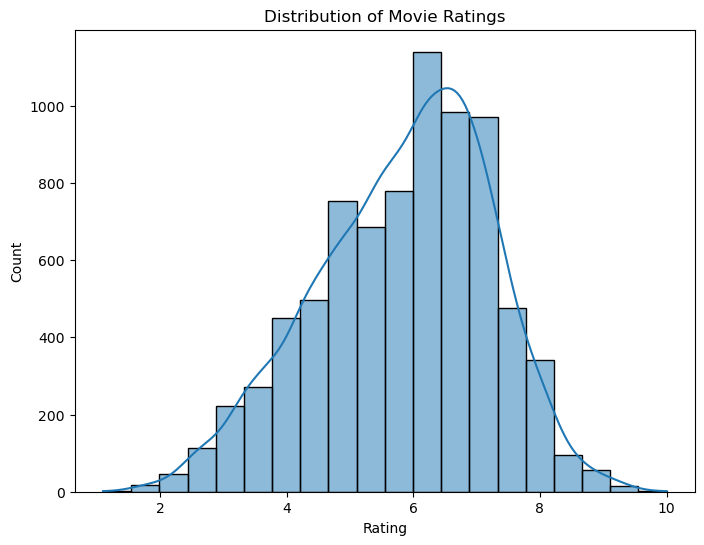

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.show()


In [21]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoders
le = LabelEncoder()

# Encode categorical features
data['Genre'] = le.fit_transform(data['Genre'])
data['Director'] = le.fit_transform(data['Director'])
data['Actor 1'] = le.fit_transform(data['Actor 1'])
data['Actor 2'] = le.fit_transform(data['Actor 2'])
data['Actor 3'] = le.fit_transform(data['Actor 3'])

# Verify the changes
data.head()


,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
1,268,7.0,811,1782,2814,377
3,207,4.4,1749,1589,890,2572
5,177,4.7,2005,508,85,2449
6,331,7.4,2643,931,1388,3029
8,367,5.6,174,2520,1461,1205


In [22]:
from sklearn.model_selection import train_test_split

# Define features and target
X = data[['Genre', 'Director', 'Actor 1','Actor 2','Actor 3']]  # Add other relevant features
y = data['Rating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Print shapes of resulting sets
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")


Training set shape: X_train=(6335, 5), y_train=(6335,)
Testing set shape: X_test=(1584, 5), y_test=(1584,)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select only numerical columns for X_train and X_test
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_numeric, y_train)

# Make predictions
y_pred = model.predict(X_test_numeric)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))


Mean Squared Error: 1.8027298822532718
R^2 Score: 0.030344730573196088
